In [9]:
# importar as bibliotecas necessárias - pandas, sklearn, matplotlib, seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [10]:
# importar a base de dados
df = pd.read_csv("/content/dropout-inaugural.csv")

In [11]:
# visualizar as primeiras linhas da base de dados
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,8,5,2.0,1,1,1,13.0,10.0,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1.0,6,1,11.0,1,1,1,1.0,3.0,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,5.0,1,1,1,22.0,27.0,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1.0,8,2,15.0,1,1,1,23.0,27.0,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2.0,12,1,3.0,0,1,1,22.0,28.0,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [12]:
# visualizar as informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   float64
 1   Application mode                                3635 non-null   int64  
 2   Application order                               3635 non-null   int64  
 3   Course                                          3629 non-null   float64
 4   Daytime/evening attendance                      3635 non-null   int64  
 5   Previous qualification                          3635 non-null   int64  
 6   Nacionality                                     3635 non-null   int64  
 7   Mother's qualification                          3632 non-null   float64
 8   Father's qualification                          3628 non-null   float64
 9   Mother's occupation                      

In [13]:
# ver os valores da coluna Target - que queremos prever
df["Target"].unique()

array(['Dropout', 'Graduate'], dtype=object)

In [14]:
df.isnull().sum()

,0
Marital status,5
Application mode,0
Application order,0
Course,6
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,3
Father's qualification,7
Mother's occupation,0


In [15]:
# tratar dados nulos
df.isnull().sum()
df.dropna(inplace=True)

# tratar dados duplicados
df.drop_duplicates(inplace=True)

# outras formas de pré-processamento (OPCIONAL - ex.: seleção de características, normalização, tratamento de outliers, balanceamento do target...)
# pode ser nessa célula ou nas seguintes, a depender do que você escolher fazer


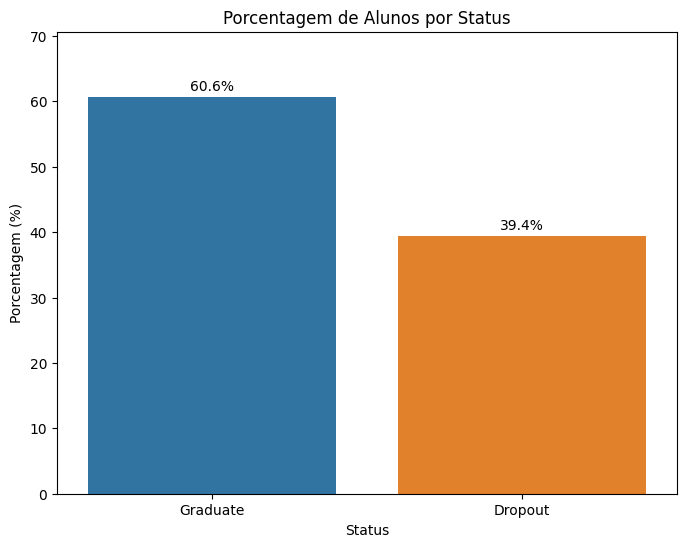

In [ ]:
# análise exploratória: crie uma pergunta sobre a base de dados e responda através de um gráfico
# Qual a porcentagem de alunos que são dropout, graduate?

# Calcula as porcentagens de cada status
porcentagens = df['Target'].value_counts(normalize=True) * 100
df_porcentagens = porcentagens.reset_index()
df_porcentagens.columns = ['Status', 'Porcentagem']

# Cria o gráfico de barras usando seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Status', y='Porcentagem', data=df_porcentagens, hue='Status')

# Adiciona os rótulos com os valores percentuais em cada barra
for i, row in df_porcentagens.iterrows():
    ax.text(i, row.Porcentagem + 1, f"{row.Porcentagem:.1f}%", ha='center')

plt.title("Porcentagem de Alunos por Status")
plt.xlabel("Status")
plt.ylabel("Porcentagem (%)")
plt.ylim(0, df_porcentagens['Porcentagem'].max() + 10)
plt.show()

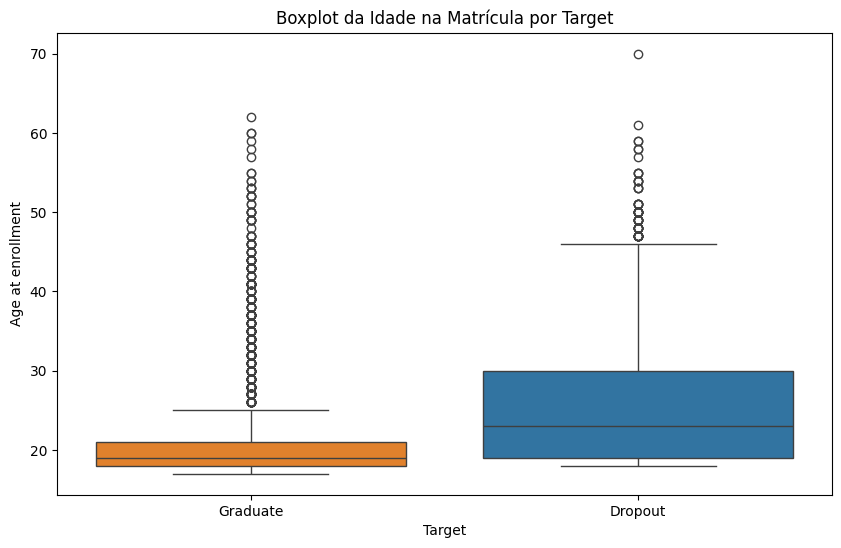

In [ ]:
# Qual a relação entre idade e se a pessoa vai evadir ou não do curso?

plt.figure(figsize=(10, 6))
ordem = ['Graduate', 'Dropout']
sns.boxplot(x='Target', y='Age at enrollment', data=df, order=ordem, hue='Target')
plt.title('Boxplot da Idade na Matrícula por Target')
plt.xlabel('Target')
plt.ylabel('Age at enrollment')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


# divisão entre caracterísiticas (X) e rótulo (y)
X = df.drop('Target', axis=1)
y = df['Target']
y= pd.get_dummies(y, drop_first=True)['Graduate']

# divisão entre treino e teste - 70% e 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)

# EXTRA - Inicializa o StandardScaler
scaler = StandardScaler()
# Ajusta o scaler com os dados de treinamento e transforma os dados
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# treinamento de modelo a sua escolha (um ou mais)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train_scaled,y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.71      0.78       426
        True       0.83      0.94      0.88       657

    accuracy                           0.85      1083
   macro avg       0.86      0.82      0.83      1083
weighted avg       0.85      0.85      0.84      1083



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

#without scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.84      0.82       426
        True       0.89      0.87      0.88       657

    accuracy                           0.86      1083
   macro avg       0.85      0.85      0.85      1083
weighted avg       0.86      0.86      0.86      1083



In [ ]:

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.81      0.86       426
        True       0.89      0.95      0.92       657

    accuracy                           0.90      1083
   macro avg       0.90      0.88      0.89      1083
weighted avg       0.90      0.90      0.90      1083



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

In [ ]:
# avaliação do modelo com dados de teste
#(para ser considerado resultado satisfatório, você deve alcançar no mínimo 90% de acurácia e 80% de recall do dropout)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.84      0.88       426
        True       0.90      0.96      0.93       657

    accuracy                           0.91      1083
   macro avg       0.92      0.90      0.91      1083
weighted avg       0.91      0.91      0.91      1083



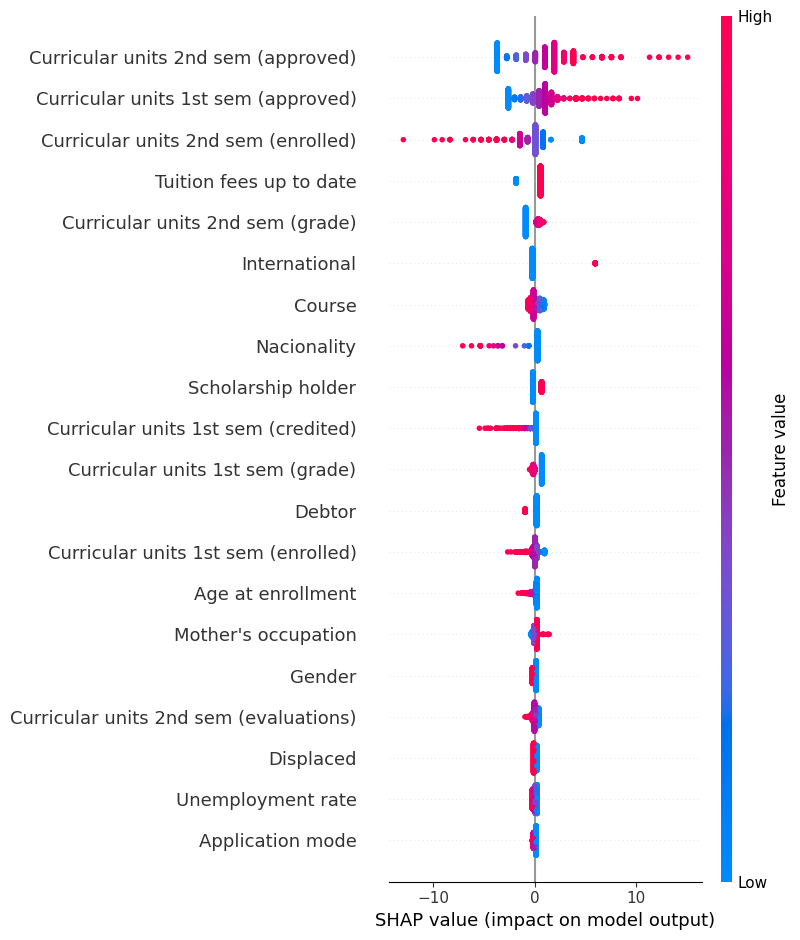

In [ ]:
# EXTRA
import pandas as pd
import shap

# Converte os arrays escalados em DataFrames com os nomes das colunas
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Crie o explicador utilizando o modelo treinado e os dados de treino com nomes
explainer = shap.LinearExplainer(lr, X_train_scaled_df)

# Calcule os valores SHAP para o conjunto de teste com nomes
shap_values = explainer.shap_values(X_test_scaled_df)

# Plote o resumo dos valores SHAP com os nomes das features
shap.summary_plot(shap_values, X_test_scaled_df)
